## Домашнее задание по математической статистике

#### Парамонов Всеволод

In [1259]:
import numpy as np
from scipy import stats
import math
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#### №1

##### а)

#### Функция правдоподобия будет иметь вид:

<br>

<center>

### $ (\frac{k-1}{n}) \cdot \prod_{i=0}^{k-2} \frac{n-i}{n} $

</center>

<br>

#### , где $ k $ - номер заказа, на котором пришел повторный таксист. $ \prod_{i=0}^{k-2} \frac{n-i}{n} $ задает вероятность выпадания уникальных таксистов, а $ (\frac{k-1}{n}) $ задает вероятность того, что на k-ом заказе придет повторный таксист (всего k-1 уникальных таксистов пришло до k-го заказа), $ k-1 <= n $


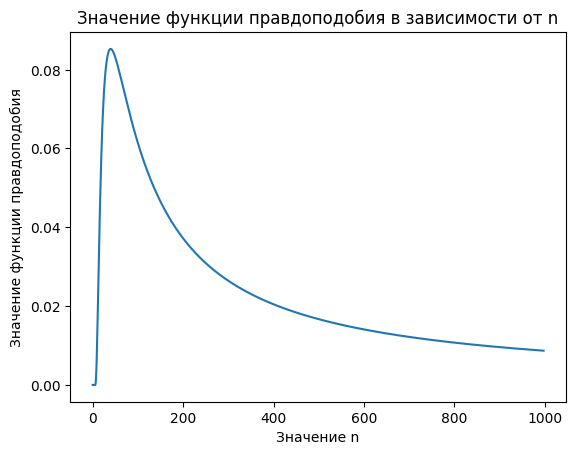

In [1294]:
def L_1(n):

    l = 1 * ((n-1)/n) * ((n-2)/n) * ((n-3)/n) * ((n-4)/n) * ((n-5)/n) * ((n-6)/n) * ((n-7)/n) * ((n-8)/n) * (9/n)

    return l

n = np.arange(2, 1000)
L_func = np.apply_along_axis(L_1, axis=0, arr=n)

plt.xlabel('Значение n')
plt.ylabel('Значение функции правдоподобия')
plt.title('Значение функции правдоподобия в зависимости от n')
plt.plot(L_func);

In [1295]:
print(f'Оценка числа n методом максимального правдоподобия: {n[L_func.argmax()]}')

Оценка числа n методом максимального правдоподобия: 42


##### б)

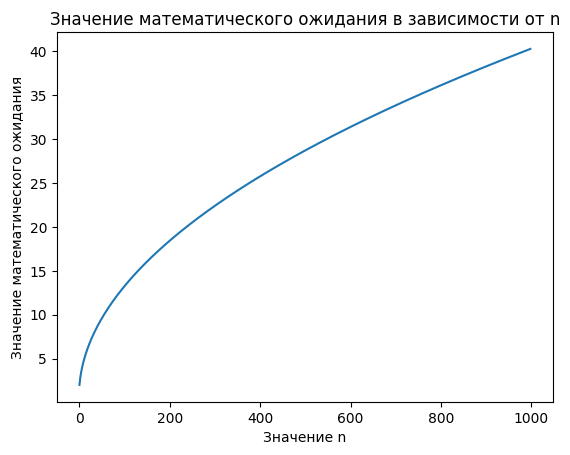

In [1329]:
def L_ot_n_k(n, k=10):

    p = 1

    for i in range(k-1):
        p *= (n-i)/n 

    p *= (k-1)/n

    return p

def matozh(n):
    s = 0
    for k in range(2, n+2):
        s += k * L_ot_n_k(n,k)
    return(s)

n_arr = np.arange(1, 1000)
ls = [matozh(i) for i in n_arr]

plt.xlabel('Значение n')
plt.ylabel('Значение математического ожидания')
plt.title('Значение математического ожидания в зависимости от n')
plt.plot(ls);

In [1331]:
e_mm = np.array(ls.copy())
e_mm -= 10

finding_min = np.apply_along_axis(abs, axis=0, arr = e_mm)
n_arr[finding_min.argmin()]

55

##### в)

In [1264]:
n = 100
mm = []
ml = []
for i in range(10000):
    sims = []
    while True:
        tax = np.random.choice(np.arange(1,n+1), size=1)[0]
        if tax not in sims:
            sims.append(tax)
        else:
            ml.append(max(sims))
            break

    mm.append(np.mean(sims))


### Оценка методом максимального правдоподобия 

In [1352]:
k_s = []

for i in range(10000):
    n_arr = np.arange(1,101)

    sim = np.random.choice(n_arr, size=len(n_arr))


    uniq = []
    k_counter = 0
    for l in sim:
        if l not in uniq:
            uniq.append(l)
            k_counter+=1
        else:
            break
    k_s.append(k_counter+1)

max_l = []

for j in k_s:
    
    n = np.arange(j-1, 1000)
    l_s = np.array([L_ot_n_k (i, j) for i in n])

    ml_ocenka = n[l_s.argmax()]
    max_l.append(ml_ocenka)


### Оценка методом моментов 

In [1353]:
n_arr = np.arange(1, 1000)
ls_for_mm = np.array(ls)

ocenki_mm = []

for k in k_s:
    
    shab = np.apply_along_axis(abs, arr=ls_for_mm - k, axis=0)
    ocenki_mm.append(n_arr[shab.argmin()])


### Гистограммы оценок методом моментов и методом максимального правдоподобия

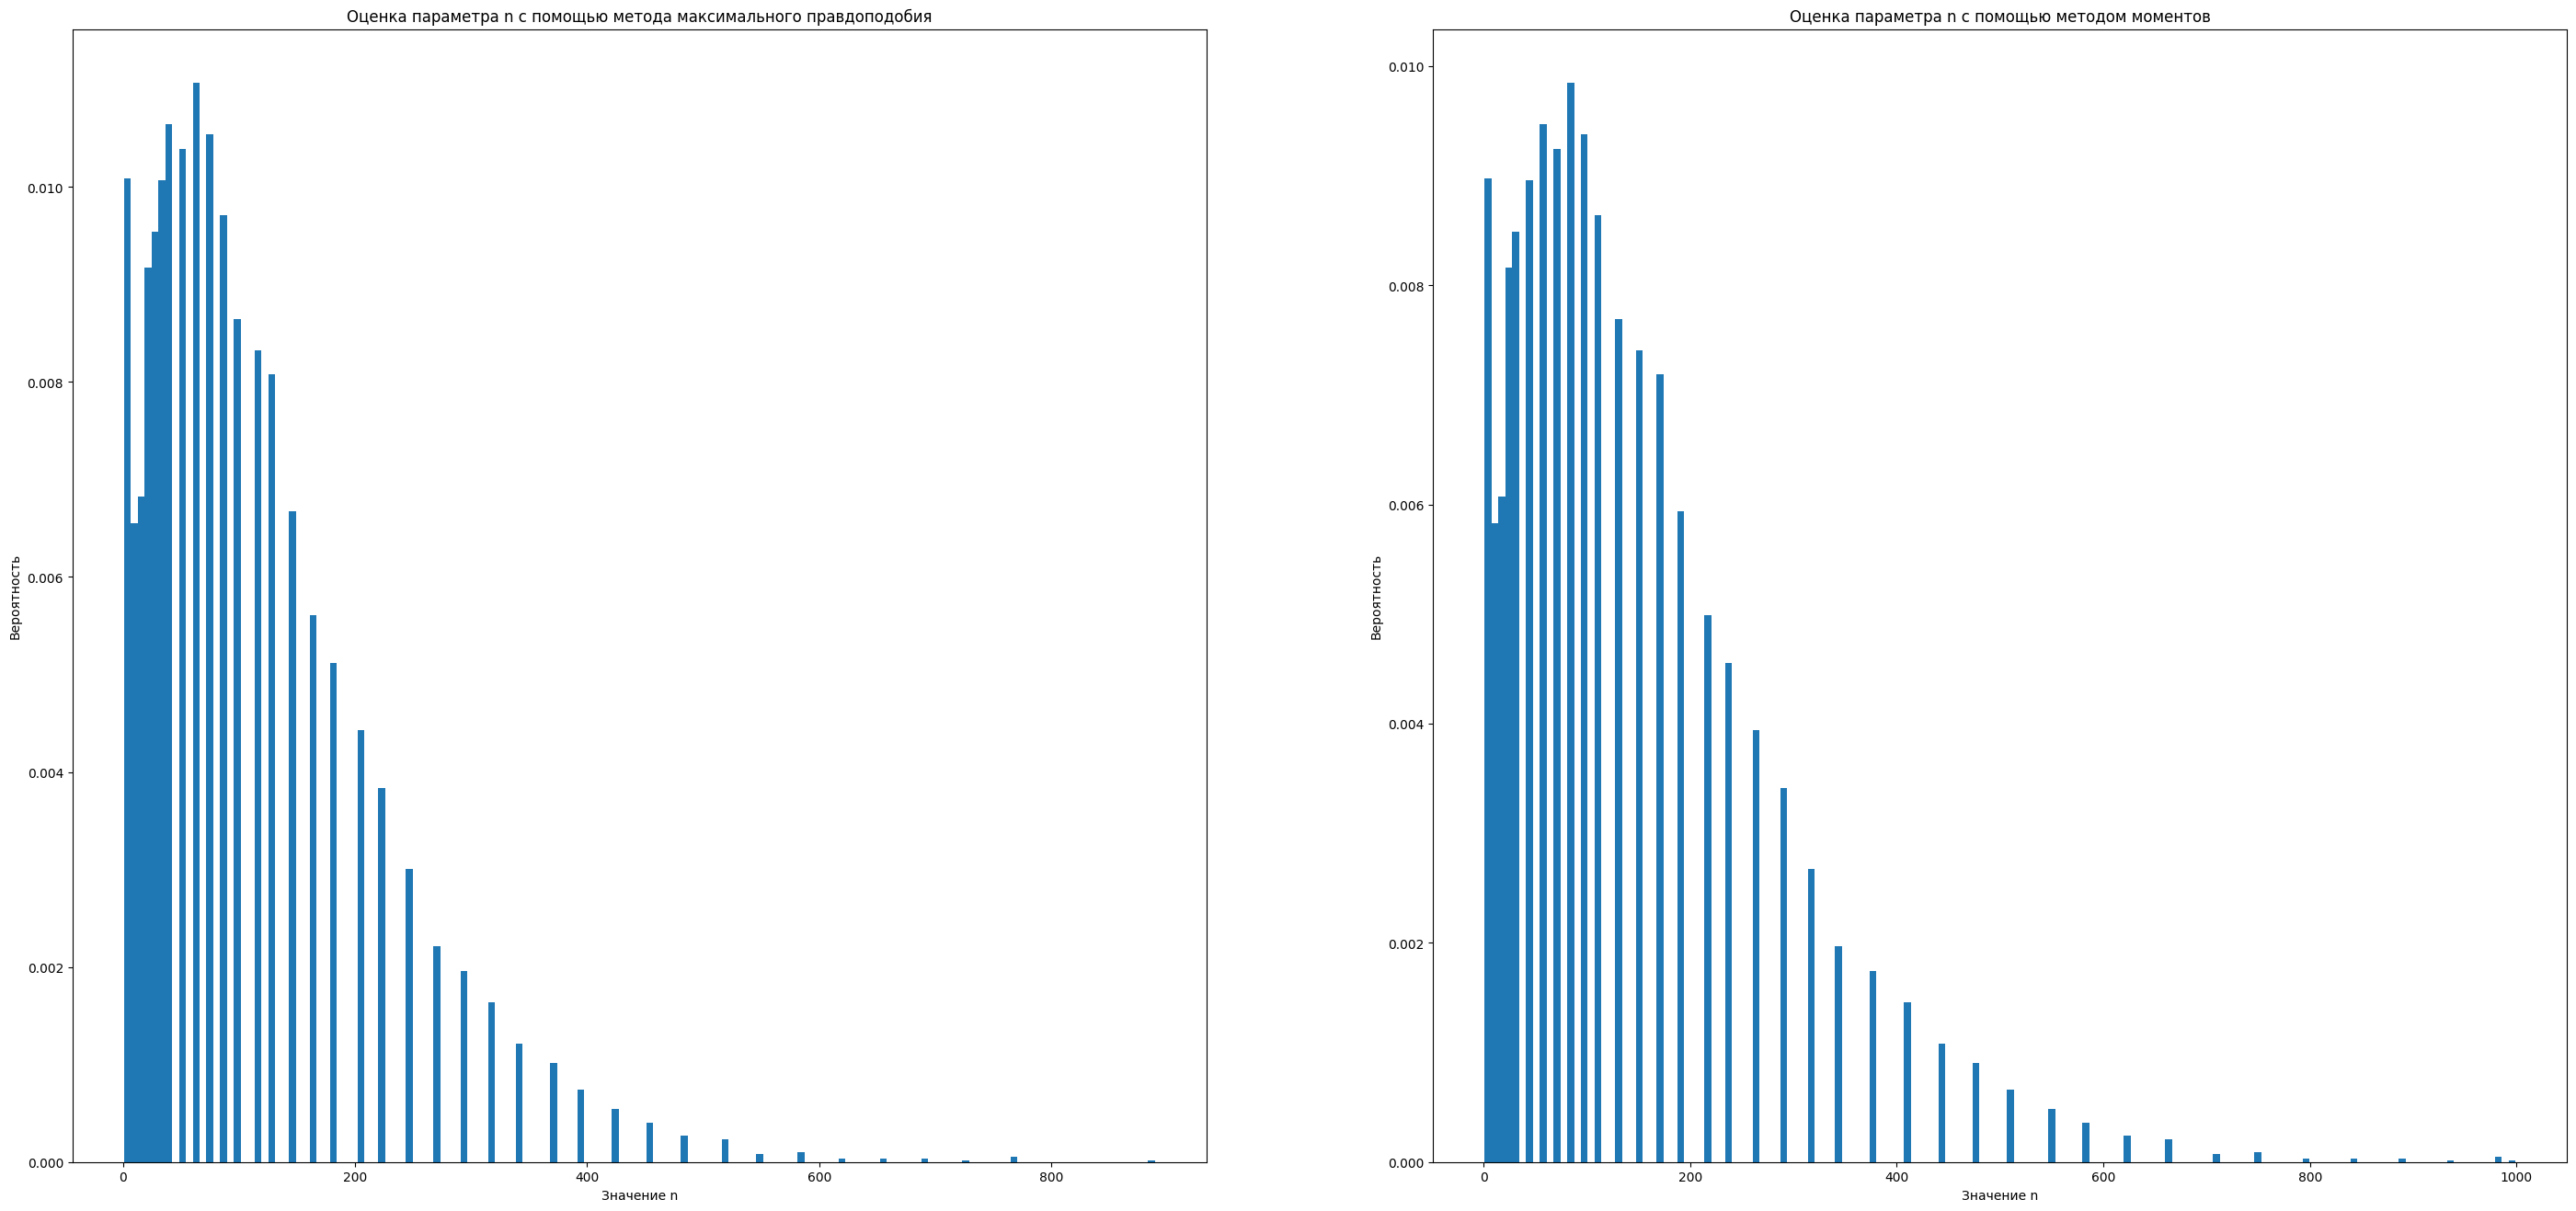

In [1354]:
figure, ax = plt.subplots(1, 2, figsize=(35,16))

ax[0].hist(max_l, bins=150, density=True)
ax[0].set(title = 'Оценка параметра n с помощью метода максимального правдоподобия')
ax[0].set_xlabel('Значение n')
ax[0].set_ylabel('Вероятность')

ax[1].hist(ocenki_mm, bins=150, density=True)
ax[1].set(title = 'Оценка параметра n с помощью методом моментов')
ax[1].set_xlabel('Значение n')
ax[1].set_ylabel('Вероятность');

### Оценка смещения, дисперсии и среднеквадратичной ошибки для MM и ML оценок

In [1268]:
from sklearn.metrics import mean_squared_error

arr_of_true_value = np.full((1, len(max_l)), 100)[0]

var_ml = np.var(max_l, ddof=1)
mse_ml = mean_squared_error(arr_of_true_value, max_l)
bias_ml = abs(np.mean(np.array(max_l) - 100))

var_mm = np.var(ocenki_mm, ddof=1)
mse_mm = mean_squared_error(arr_of_true_value, ocenki_mm)
bias_mm = abs(np.mean(np.array(ocenki_mm) - 100))

d = {
    'Смщение': [bias_ml, bias_mm],
    'Дисперсия': [var_ml, var_mm],
    'MSE': [mse_ml, mse_mm]
}

df = pd.DataFrame.from_dict(d, orient='index', columns=['Оценка ML', 'Оценка MM'])

df

,Оценка ML,Оценка MM
Смщение,5.690300,23.007800
Дисперсия,8327.914577,13720.597399
MSE,8359.461300,14248.584200


#### №2

#### Чтобы составить функцию правдоподобия для данной задачи, нужно разбить ее на несколько частей:

#### **1) Генерация уникальных таксистов**

#### Введем несколько обозначений: $ n $ - количество уникальных таксистов, $ m $ - количество заказов, $ k $ - количество уникальных таксистов, которое встретились за $ m $ заказов

#### Поэтому вероятность встретить k уникальных таксистов будет равняться:

<center>

### $ \prod_{i=0}^{k-1} \frac{n-i}{n} $

</center>

#### **2) Расстановка повторяющихся таксистов**

#### Чтобы дополнить формулу нужно учесть повторно встречающихся таксистов. Для этого введем обозначение $ \frac{q}{n} $, где $ q \in \{1, \ldots, k\} $ - номера уже встретевшихся таксистов, т.е. для каждой симуляции $ q $ будет обозначать количество уникальных таксистов, которые встретились в ходе сумуляции. Стоит отметить, что в $ q $ могут лежать не элементы от $ 1 $ до $ k $, но и не идущие подряд элементы, т.е. $ \{1, 4, 5, ...\} $. Теперь надо учесть количество перестановок. Это будет выглядеть таким образом: мы будем перемножать $ C_{m-1}^{m-k} $ на $ (\frac{i}{n}) $, где $ i $ - каждый элемент в массиве уникальных таксистов

#### а)

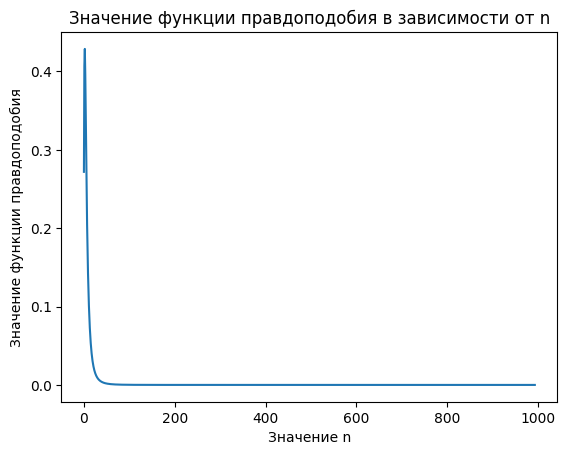

In [1269]:
def likelihood_2(k, n, m = 10):
    p = 1
    summ = 0

    for i in range(1, k):
        p *= ((n-i)/n)

    combs = itertools.combinations_with_replacement(np.arange(1, k+1), m - k)

    for el in combs:
        p_2 = 1
        
        for i in range(m-k):
            p_2 *= el[i]

        summ += p_2
    p *= (summ/(n**(m - k)))
    return p 

n_s = np.arange(6,1000)
ls = np.array([likelihood_2(6, i) for i in range(6, 1000)])

plt.xlabel('Значение n')
plt.ylabel('Значение функции правдоподобия')
plt.title('Значение функции правдоподобия в зависимости от n')
plt.plot(ls);


In [1270]:
print(f'Оценка числа n методом максимального правдоподобия: {n_s[ls.argmax()]}')

Оценка числа n методом максимального правдоподобия: 8


#### б)

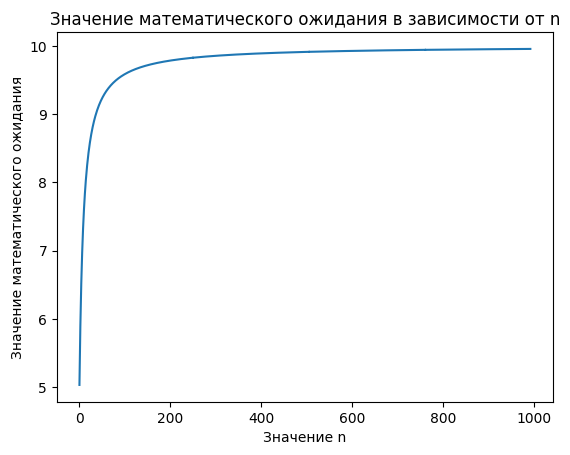

In [1372]:
mm_oc=[]
for num in n_s:
    summ = 0
    for kk in range(1, 10+1):
        summ += kk * likelihood_2(kk, num)

    mm_oc.append(summ)

plt.xlabel('Значение n')
plt.ylabel('Значение математического ожидания')
plt.title('Значение математического ожидания в зависимости от n')
plt.plot(mm_oc);

In [1272]:
e_mm = np.array(mm_oc.copy())
e_mm -= 6

finding_min = np.apply_along_axis(abs, axis=0, arr = e_mm)
print('Оценка n с помощью метода моментов', n_s[finding_min.argmin()])

Оценка n с помощью метода моментов 8


#### в)

### Оценка методом максимального правдоподобия 

In [1390]:
uniq_tx = []

np.random.seed(19)

for i in range(10000):
    n_arr = np.arange(1,21)

    sim = np.random.choice(n_arr, size=10)

    uniq_tx.append(len(np.unique(sim)))


max_l = []

for j in uniq_tx:
    
    n = np.arange(j, 1000)
    l_s = np.array([likelihood_2 (j, i) for i in range(j, 1000)])

    ml_ocenka = n[l_s.argmax()]
    max_l.append(ml_ocenka)

max_l = np.array(max_l)

In [1391]:
max_l_a = list(map(lambda x: 100 if x > 100 else x, max_l))

### Оценка методом моментов 

In [1392]:
n_arr = np.arange(1, 2000)
mm_oc_rem = np.array(mm_oc)

ocenki_mm = []

for k in uniq_tx:
    
    shab = np.apply_along_axis(abs, arr=mm_oc_rem - k, axis=0)
    ocenki_mm.append(n_arr[shab.argmin()])

ocenki_mm = np.array(ocenki_mm)

In [1388]:
ocenki_mm_a = list(map(lambda x: 100 if x >= 100 else x, ocenki_mm))

### Гистограммы оценок методом моментов и методом максимального правдоподобия

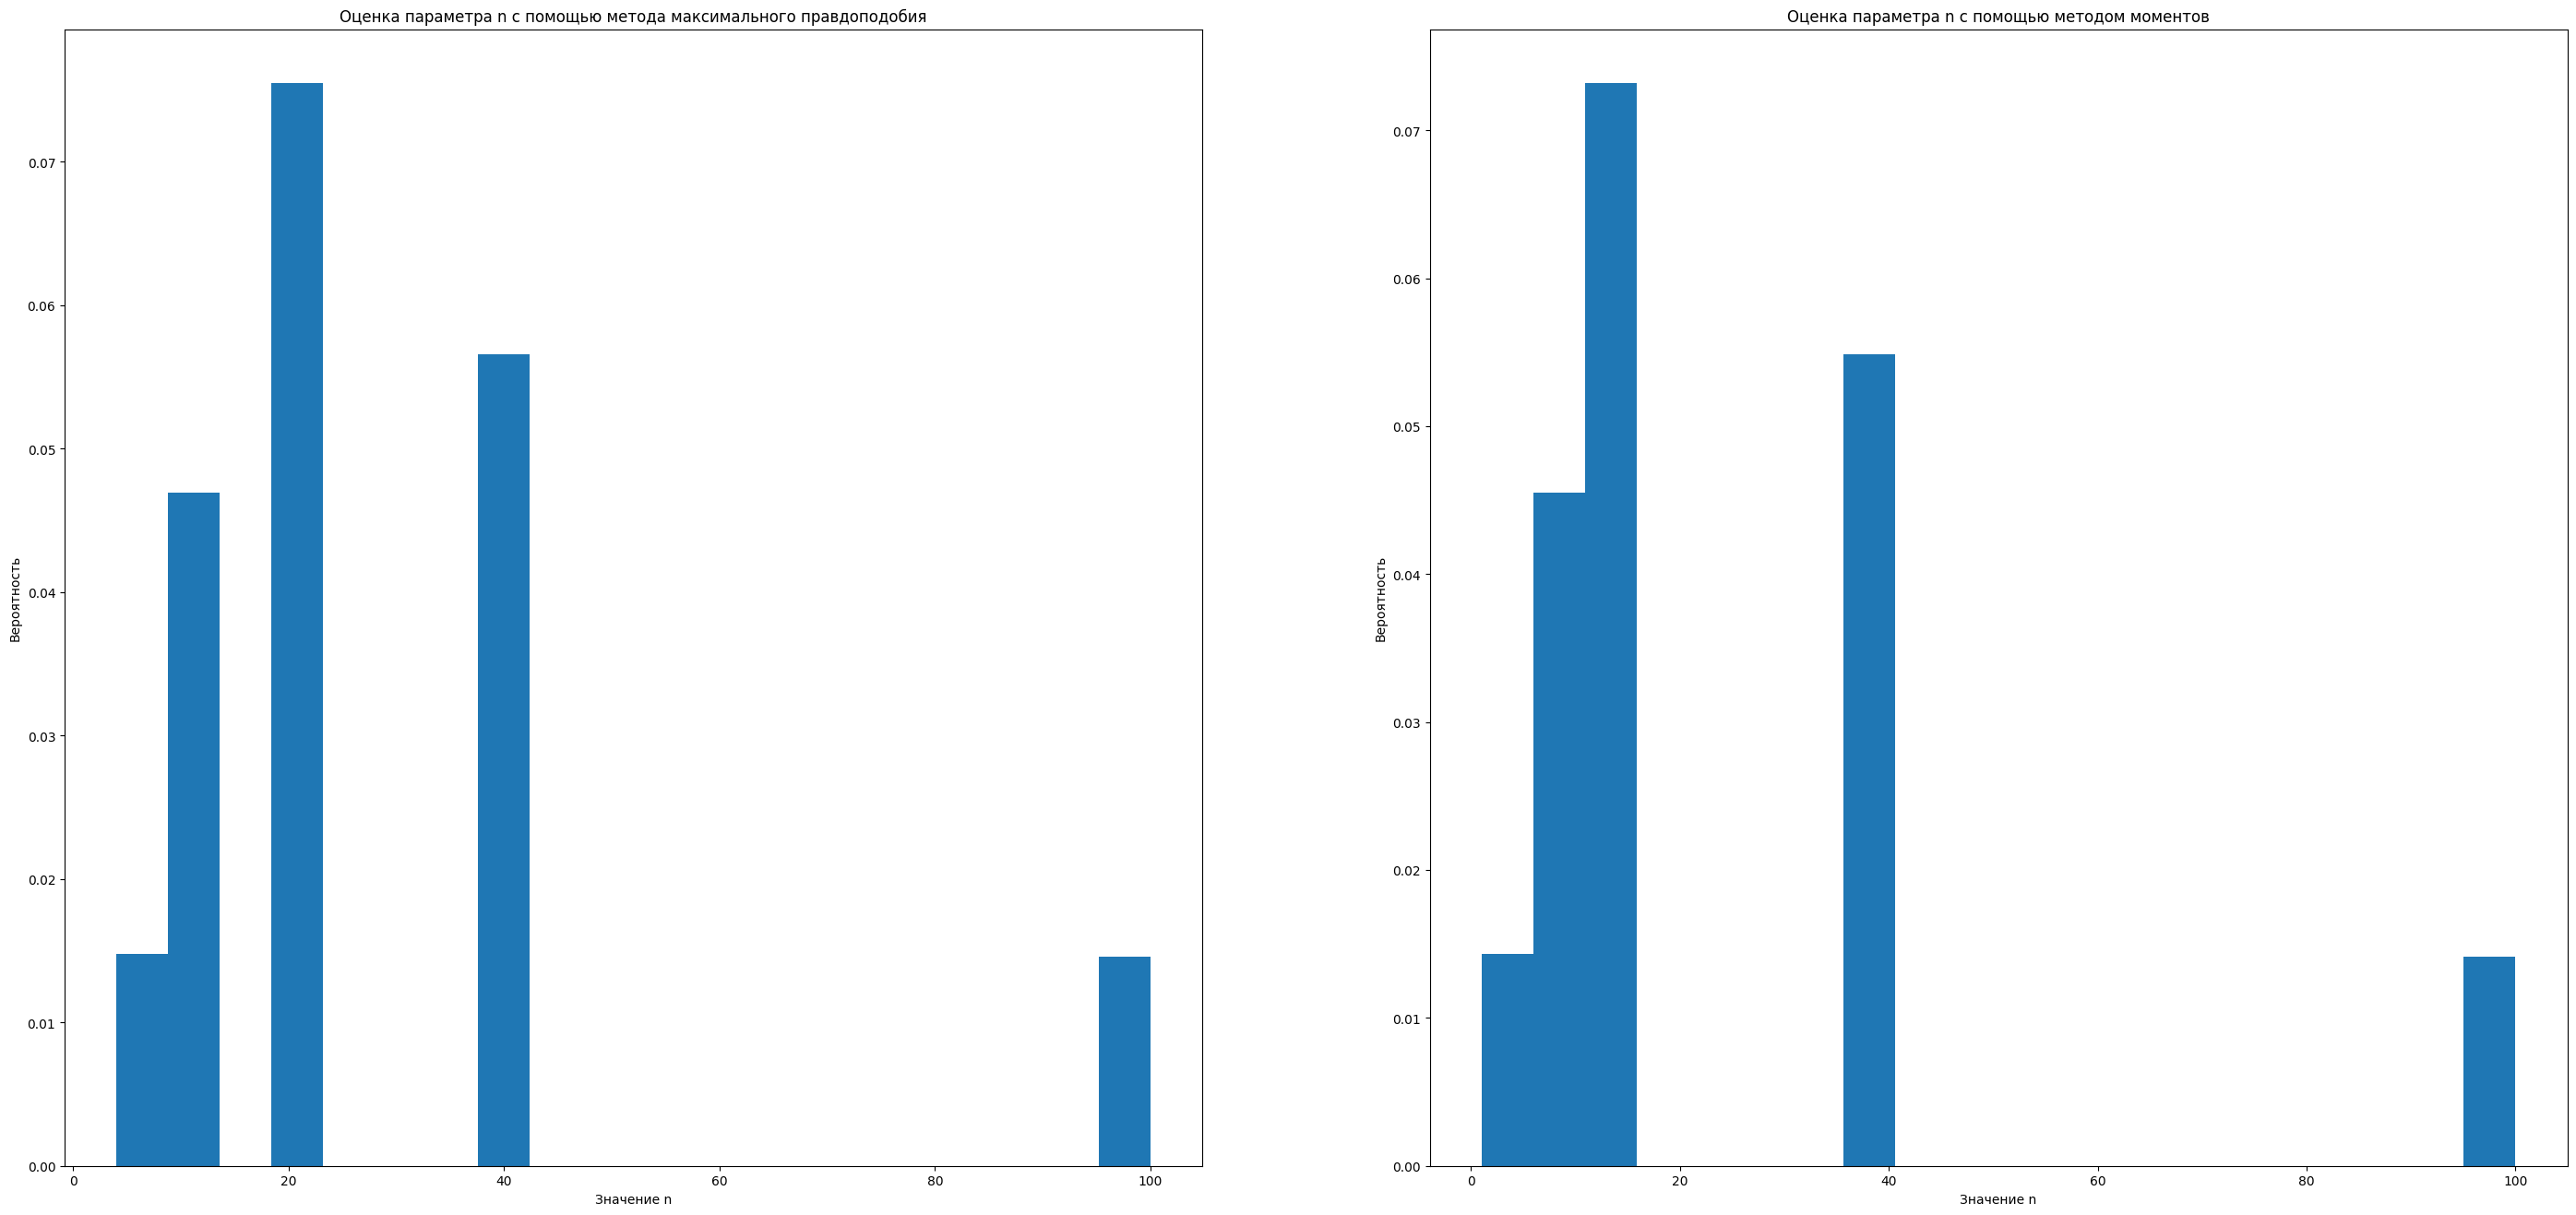

In [1389]:
figure, ax = plt.subplots(1, 2, figsize=(35,16))

ax[0].hist(max_l_a, bins=20,density=True)
ax[0].set(title = 'Оценка параметра n с помощью метода максимального правдоподобия')
ax[0].set_xlabel('Значение n')
ax[0].set_ylabel('Вероятность')

ax[1].hist(ocenki_mm_a, bins=20,density=True)
ax[1].set(title = 'Оценка параметра n с помощью методом моментов')
ax[1].set_xlabel('Значение n')
ax[1].set_ylabel('Вероятность');

In [1393]:
n_arr = np.arange(1, 1000)
ls_for_mm = np.array(ls)

ocenki_mm = []

for k in k_s:
    
    shab = np.apply_along_axis(abs, arr=ls_for_mm - k, axis=0)
    ocenki_mm.append(n_arr[shab.argmin()])


### Оценка смещения, дисперсии и среднеквадратичной ошибки для MM и ML оценок

In [1395]:
arr_of_true_value = np.full((1, len(max_l_a)), 20)[0]

var_ml = np.var(max_l_a, ddof=1)
mse_ml = mean_squared_error(arr_of_true_value, max_l_a)
bias_ml = abs(np.mean(np.array(max_l_a) - 20))

var_mm = np.var(ocenki_mm_a, ddof=1)
mse_mm = mean_squared_error(arr_of_true_value, ocenki_mm_a)
bias_mm = abs(np.mean(ocenki_mm_a) - 20)

d = {
    'Смщение': [bias_ml, bias_mm],
    'Дисперсия': [var_ml, var_mm],
    'MSE': [mse_ml, mse_mm]
}

df = pd.DataFrame.from_dict(d, orient='index', columns=['Оценка ML', 'Оценка MM'])

df

,Оценка ML,Оценка MM
Смщение,8.535000,8.511600
Дисперсия,532.326008,576.644631
MSE,605.119000,594.698800


#### №3

#### а) CI

In [1248]:
n_sim = 10000

In [1249]:
mus = []
for i in range(n_sim):

    sample = np.random.exponential(1, size=20)
    left_border = np.mean(sample) - 1.96 * (np.std(sample, ddof=1)/np.sqrt(20))
    right_border = np.mean(sample) + 1.96 * (np.std(sample, ddof=1)/np.sqrt(20))

    if left_border < 1 and 1 < right_border:
        mus.append(1)
    else:
        mus.append(0)

print('Вероятность накрытия:', np.mean(mus))

Вероятность накрытия: 0.9041


#### б) Наивный бутстрэп 

In [1005]:
verdicts = []

for j in range(n_sim):
    mu = []
    sample_init = np.random.exponential(1, size=20)
    for i in range(n_sim):

        sample = np.random.choice(sample_init, size=20, replace=True)

        mu.append(sample.mean())

    ql = np.percentile(mu, 2.5)
    qr = np.percentile(mu, 97.5)

    if ql < 1 and 1 < qr:
        verdicts.append(1)
    else:
        verdicts.append(0)
    
print('Вероятность накрытия', np.mean(verdicts))

Вероятность накрытия 0.903


#### в) Бутстрэп t-статистики

In [1009]:
verdicts = []

for j in range(n_sim):
    sample_init = np.random.exponential(1, size=20)
    mu_tru = np.mean(sample)
    mu = []
    for i in range(n_sim):

        resample = np.random.choice(sample_init, size=20, replace=True)

        R_hat = (np.mean(resample) - mu_tru)/stats.sem(resample, ddof=1)

        mu.append(R_hat)

    ql = np.percentile(mu, 2.5)
    qr = np.percentile(mu, 97.5)

    st = (1 - mu_tru)/stats.sem(sample_init, ddof=1)
    if ql < st and st < qr:
        verdicts.append(1)
    else:
        verdicts.append(0)

print('Вероятность накрытия:', np.mean(verdicts))

Вероятность накрытия: 0.8082


#### б)

#### Асимптотический нормальный интервал

In [1332]:
mus = []
for i in range(n_sim):

    sample = stats.t.rvs(df=3, size=20)
    left_border = np.mean(sample) - 1.96 * (np.std(sample, ddof=1)/np.sqrt(20))
    right_border = np.mean(sample) + 1.96 * (np.std(sample, ddof=1)/np.sqrt(20))

    if left_border < 0 and 0 < right_border:
        mus.append(1)
    else:
        mus.append(0)

print('Вероятность накрытия:', np.mean(mus))

Вероятность накрытия: 0.9419


#### Наивный бутстрэп

In [1006]:
verdicts = []

for j in range(n_sim):

    sample_init = stats.t.rvs(df=3, size=20)
    mu = []
    for i in range(n_sim):

        sample = np.random.choice(sample_init, size=20, replace=True)

        mu.append(sample.mean())

    ql = np.percentile(mu, 2.5)
    qr = np.percentile(mu, 97.5)

    if ql < 0 and 0 < qr:
        verdicts.append(1)
    else:
        verdicts.append(0)
    
print('Вероятность накрытия:', np.mean(verdicts))

Вероятность накрытия: 0.9197


#### Бутстрэп t-статистики

In [1007]:
verdicts = []


for j in range(n_sim):
    sample_init = stats.t.rvs(df=3, size=20)
    mu_tru = np.mean(sample_init)

    mu = []
    for i in range(n_sim):

        resample = np.random.choice(sample_init, size=20, replace=True)

        R_hat = (np.mean(resample) - mu_tru)/stats.sem(resample)

        mu.append(R_hat)

    ql = np.percentile(mu, 2.5)
    qr = np.percentile(mu, 97.5)

    st = (mu_tru - 0)/stats.sem(sample_init, ddof=1)
    if ql < st and st < qr:
        verdicts.append(1)
    else:
        verdicts.append(0)

print('Вероятность накрытия:', np.mean(verdicts))

Вероятность накрытия: 0.9262


#### в)

#### №4

In [ ]:
data = pd.read_csv('/Users/vsevolodparamonov/Downloads/marks.csv', sep=';')

In [ ]:
data

,Фамилия,Результат
0,Репенкова,16
1,Ролдугина,0
2,Сафина,19
3,Сидоров,26
4,Солоухин,21
...,...,...
327,Сенников,19
328,Ся,0
329,Сятова,0
330,Темиркулов,0


In [ ]:
def vowel_checking(x):
    x = x[0]
    vowels = ['а', 'е', 'ё', 'и', 'о', 'у', 'ы', 'э', 'ю', 'я']
    return x.lower() in vowels

data['Гласная'] = data['Фамилия'].apply(vowel_checking)

In [ ]:
data

,Фамилия,Результат,Гласная
0,Репенкова,16,False
1,Ролдугина,0,False
2,Сафина,19,False
3,Сидоров,26,False
4,Солоухин,21,False
...,...,...,...
327,Сенников,19,False
328,Ся,0,False
329,Сятова,0,False
330,Темиркулов,0,False


### Разделение на выборки

In [ ]:
glasn = data[data['Гласная'] == True]['Результат'].values
sogl = data[data['Гласная'] == False]['Результат'].values

## Проверка гипотезы

<center>

#### $ H_0: \mu_{г} = \mu_{с} $

#### $ H_1: \mu_{г} \neq \mu_{с} $

In [ ]:
alpha = 0.05

### а) Тест Уэлча

In [ ]:
t_welch_pvalue = stats.ttest_ind(glasn, sogl, equal_var = False).pvalue

if t_welch_pvalue > alpha:
    print('H0 не отвергается')
else:
    print('H0 отвергается')

print('p-value:', t_welch_pvalue)

H0 не отвергается
p-value:  0.3974027153843839


#### б) Наивный бутстрэп

In [ ]:
n_simulations = 100

true_value = glasn.mean() - sogl.mean()

mean_diffs = []

for i in range(10000):
    glasn_generated = np.random.choice(glasn, size=len(glasn), replace=True)
    sogl_generated = np.random.choice(sogl, size=len(sogl), replace=True)
    mean_diffs.append(glasn_generated.mean() - sogl_generated.mean())

ql = np.percentile(mean_diffs, 2.5)
qr = np.percentile(mean_diffs, 97.5)

if ql < true_value and true_value < qr:
    print('H0 не отвергается')
else:
    print('H0 отвергается')

p_value = min(1 - (np.array(mean_diffs) < true_value).sum()/len(mean_diffs), (np.array(mean_diffs) < true_value).sum()/len(mean_diffs)) * 2
print('p-value:', p_value)

H0 не отвергается
p-value: 0.9828


#### в) Бутстрэп t-статистики

In [ ]:
true_value = glasn.mean() - sogl.mean()

true_se = np.sqrt((glasn.var(ddof=1)/len(glasn)) + (sogl.var(ddof=1)/len(sogl)))

cent_func = (true_value - 0)/true_se

thetas = []

for i in range(10000):

    glasn_generated = np.random.choice(glasn, size=len(glasn), replace=True)
    sogl_generated = np.random.choice(sogl, size=len(sogl), replace=True)

    glasn_generated_mean = glasn_generated.mean()
    glasn_generated_std = glasn_generated.var(ddof=1)/len(glasn_generated)

    sogl_generated_mean = sogl_generated.mean()
    sogl_generated_std = sogl_generated.var(ddof=1)/len(sogl_generated)

    cent_func_star = (glasn_generated_mean - sogl_generated_mean - true_value)/np.sqrt(sogl_generated_std + glasn_generated_std)

    thetas.append(cent_func_star)

ql = np.percentile(thetas, 2.5)
qr = np.percentile(thetas, 97.5)

if ql < cent_func and cent_func < qr:
    print('H0 не отвергается')
else:
    print('H0 отвергается')

p_value = min(1 - (np.array(thetas) < cent_func).sum()/len(thetas), (np.array(thetas) < cent_func).sum()/len(thetas)) * 2
print('p-value:', p_value)


H0 не отвергается
p-value: 0.3766


#### г) Перестановочный тест

In [ ]:
mu_s = []

true_value = glasn.mean() - sogl.mean()

means = []

for i in range(10000):
    
    gen = np.concatenate([glasn, sogl])

    permuted = np.random.permutation(gen)

    sogl_perm = permuted[:len(sogl)]
    glasn_perm = permuted[len(sogl):]


    means.append(glasn_perm.mean() - sogl_perm.mean())

ql = np.percentile(means, 2.5)
qr = np.percentile(means, 97.5)

if ql < true_value and true_value < qr:
    print('H0 не отвергается')
else:
    print('H0 отвергается')

p_value = min(1 - (np.array(means) < true_value).sum()/len(means), (np.array(means) < true_value).sum()/len(means)) * 2
print('p-value:', p_value)

H0 не отвергается
p-value: 0.3704


#### №5

### **ТАБЛИЦА СОПРЯЖЕННОСТИ** 

<center>

<table>
<tr>
<td>

|| >= медианы |  < медианы|
|--|--|--|
|Гласная| x | y |
|Согласная| z | r |

</td>
</tr>

</center>

In [861]:
gen = np.concatenate([glasn, sogl])

med = np.median(gen)

glasn_greater_median = sum(glasn >= med)
glasn_lower_median = sum(glasn < med)

sogl_greater_median = sum(sogl >= med)
sogl_lower_median = sum(sogl < med)

matrix = np.array([[glasn_greater_median, glasn_lower_median], [sogl_greater_median, sogl_lower_median]])

matrix

array([[ 21,  28],
       [145, 138]])

#### а) as CI для отношения шансов

### 1) Определяем $ OR $

<center>

### $ OR = \frac{p_a/(1-p_a)}{p_b/(1-p_b)} \Rightarrow ln (\hat{OR}) = ln(\frac{\hat{p_a}}{1-\hat{p_a}}) - ln(\frac{\hat{p_b}}{1-\hat{p_b}}) $

</center>

<br>

### 2) Раскладываем в ряд Тейлора

<center>

### $ \hat{OR} = ln(\frac{\hat{p}}{1-\hat{p}}) \approx ln(\frac{p}{1-p}) + \frac{1}{p(1-p)}(\hat{p} - p) $

### $ \mathbb{E}[ln(\frac{\hat{p}}{1-\hat{p}})] \approx ln(\frac{p}{1-p}) $

### $ \mathbb{VAR}(ln(\frac{\hat{p}}{1-\hat{p}})) \approx (\frac{1}{p(1-p)})^2 \cdot \mathbb{VAR}(\hat{p}) = \frac{1}{p(1-p)n}$

### $ ln(\hat{OR}) \sim \mathbb{N}(ln(\frac{p}{1-p}), \frac{1}{p(1-p)n}) $

</center>

### 3) Проводим аналогию для нашего случая

<center>

### $ ln(\hat{OR}) \sim \mathbb{N}(ln(\frac{p_a(1-p_a)}{p_b(1-p_b)}), \frac{1}{p_a (1-p_a) n_a} + \frac{1}{p_b (1-p_b) n_b}) $

## Проверка гипотезы

<center>

#### $ H_0: OR = 1 \ \text{  или  } \ ln(OR) = 0$ 

#### $ H_1: OR \neq 1  \ \text{  или  } \ ln(OR) \neq 0$

In [1338]:
p_a = matrix[0][0]/(matrix[0][0] + matrix[0][1])
p_b = matrix[1][0]/(matrix[1][0] + matrix[1][1]) 

true_odd = np.log((p_b/(1-p_b))/(p_a/(1-p_a)))

ln_or = - np.log(p_b/(1-p_b)) + np.log(p_a/(1-p_a))
se_ln_or = np.sqrt(1/(p_a * (1-p_a) * (matrix[0][0] + matrix[0][1])) + 1/(p_b * (1-p_b) * (matrix[1][0] + matrix[1][1])))
ci = (np.exp(ln_or) * np.exp(-1.96 * se_ln_or), np.exp(ln_or) * np.exp(1.96 * se_ln_or))

rasp = (true_odd - 0)/se_ln_or # ~ N(0,1)

print(f'95% as CI для OR:', ci)

if ci[0] < np.exp(ln_or) and np.exp(ln_or) < ci[1]:
    print('H0 не отвергается')
else:
    print('H0 отвергается')

p_value = min(stats.norm.cdf(rasp, loc=0, scale=1), 1 - stats.norm.cdf(rasp, loc=0, scale=1))*2

print('p-value:', p_value)

95% as CI для OR: (0.38709024318230967, 1.3162320763800786)
H0 не отвергается
p-value: 0.280180274566451


#### б) as CI для отношения вероятностей

### Аналогичный вывод как и для OR

## Проверка гипотезы

<center>

#### $ H_0: \frac{p_{сдать}}{p_{\text{не сдать}}} = 1 $

#### $ H_1: \frac{p_{сдать}}{p_{\text{не сдать}}} \neq 1 $

In [1348]:
p_pass = (matrix[0][0])/(matrix[0][0] + matrix[0][1])
p_not_pass = (matrix[1][0])/(matrix[1][0] + matrix[1][1])

p_true = np.log(p_pass/p_not_pass)

ln_rr = np.log(p_pass/p_not_pass)
se_ln_rr = np.sqrt(1/matrix[1][0] + 1/matrix[0][0] - 1/(matrix[0][0] + matrix[0][1]) - 1/(matrix[1][0] + matrix[1][1]))


ci_rr = (np.exp(ln_rr) * np.exp(-1.96 * se_ln_rr), np.exp(ln_rr) * np.exp(1.96 * se_ln_rr))

print(f'95% as CI для RR:', ci_rr)

if ci_rr[0] <  p_pass/p_not_pass and p_pass/p_not_pass  < ci_rr[1]:
    print('H0 не отвергается')
else:
    print('H0 отвергается') 

rasp = (p_true - 0)/se_ln_rr # ~ N(0,1)

p_value = min(stats.norm.cdf(rasp), 1 - stats.norm.cdf(rasp)) * 2

print('p-value:', p_value)



95% as CI для RR: (0.5937492173912553, 1.1783661158504992)
H0 не отвергается
p-value: 0.3070947928050547


#### в) CI для отношения шансов с помощью наивного бутстрэпа 

In [898]:
gen = np.concatenate([glasn, sogl])

odds = []

p_pass = (matrix[0][0])/(matrix[0][0] + matrix[0][1])
p_not_pass = (matrix[1][0])/(matrix[1][0] + matrix[1][1])

true_odd = ((p_not_pass)/(1-p_not_pass))/((p_pass)/(1-p_pass))

for i in range(10000):

    group_1 = np.random.choice(glasn, size=len(glasn))
    group_2 = np.random.choice(sogl, size=len(sogl))

    group_1_passed = sum(group_1 >= med)
    group_1_not_passed = sum(group_1 < med)

    group_2_passed = sum(group_2 >= med)
    group_2_not_passed = sum(group_2 < med)

    matrix_boot = np.array([[group_1_passed, group_1_not_passed], [group_2_passed, group_2_not_passed]])

    p_a = matrix_boot[0][0]/(matrix_boot[0][0] + matrix_boot[0][1])
    p_b = matrix_boot[1][0]/(matrix_boot[1][0] + matrix_boot[1][1]) 

    odd = (p_b/(1-p_b))/(p_a/(1-p_a))

    odds.append(odd)

ql = np.percentile(odds, 2.5)
qr = np.percentile(odds, 97.5)

print(f'95% as CI для RR с помощью бутстрэпа:', (ql, qr))

if ql < true_odd and true_odd < qr:
    print('H0 не отвергается')
else:
    print('H0 отвергается')


p_value = min(1 - (np.array(odds) < true_odd).sum()/len(odds), (np.array(odds) < true_odd).sum()/len(odds)) * 2
print('p-value:', p_value)

95% as CI для RR с помощью бутстрэпа: (0.7623987854251011, 2.6449744888936007)
H0 не отвергается
p-value: 0.9952


#### №6

#### а)

In [ ]:
data['Длина'] = data['Фамилия'].apply(len)
data

,Фамилия,Результат,Гласная,Длина
0,Репенкова,16,False,9
1,Ролдугина,0,False,9
2,Сафина,19,False,6
3,Сидоров,26,False,7
4,Солоухин,21,False,8
...,...,...,...,...
327,Сенников,19,False,8
328,Ся,0,False,2
329,Сятова,0,False,6
330,Темиркулов,0,False,10


In [ ]:
betta = np.mean(data['Результат'])/np.mean(data['Длина'])
print('Оценка коэффициента β с помощью ММ:', betta)

Оценка коэффициента β с помощью ММ: 2.0613026819923372


In [ ]:
corr = np.corrcoef(data['Результат'].values, data['Длина'].values)[0][1]
print('Значение выборочной корреляции:', corr)

Значение выборочной корреляции: 0.0253280526691477


#### б)

## Проверка гипотезы

<center>

#### $ corr = 0 $

#### $ corr \neq 0 $

In [932]:
corrs = []

corr_true = np.corrcoef(data['Длина'], data['Результат'])[0][1]

for i in range(10000):

    shuffled = np.random.choice(data['Результат'].values, size=len(data['Результат'].values), replace=False)

    corr_shuffled = np.corrcoef(shuffled, data['Длина'].values)[0][1]

    corrs.append(corr_shuffled)

ql = np.percentile(corrs, 2.5)
qr = np.percentile(corrs, 97.5)

if ql < 0 and 0 < qr:
    print('H0 не отвергается')
else:
    print('H0 отвергается')

p_value = min(1 - (np.array(corrs) < corr_true).sum()/len(corrs), (np.array(corrs) < corr_true).sum()/len(corrs)) * 2
print('p-value:', p_value)    

H0 не отвергается
p-value: 0.6332


#### №7

#### **Условие задачи:**

### Две команды равной силы играют в волейбол до трёх побед одной из них, не обязатель- но подряд. Ничья невозможна. Из-за равенства сил будем считать, что вероятность победы каждой равна $ 0.5 $. Величина $ N $ — количество сыгранных партий.
### Составьте табличку возможных значений N с их вероятностями. Найдите $ \mathbb{P}(N — чётное), E(N) $.


### **Ссылка на чат с ChatGPT:** https://chat.openai.com/share/479d668e-5bd6-4c14-95d4-efd87d33b690



#### №8

1) Лекции ШАД

Помогли подробнее разобраться с основами математической статистики, ее применением в А/Б тестах. Также были затронуты темы бутстрэпа. Key feature: в лекциях параллельно показывали применение матстата в питоне + визуализиции помогли составить представление как выглядит то или иное свойство

2) [Канал Vital Math](https://www.youtube.com/@VitalMath)

Канал был полезен для курса по анализу данных (когда задания были связаны с проверками всяких парадоксов, т.е. в целом на матстат), но все равно помогло наглядно изучить парадоксы, чтобы понять как их решать и почему они вообще возникают 

3) [Канал Глеба Михайлова](https://www.youtube.com/@GlebMikhaylov)

В целом канал не про матстат, но все равно есть пару полезных видео, где Глеб объясняет методологию проверок гипотез для направления DS

4) [Канал Прикладная статистика](https://www.youtube.com/@user-bg8cd4fn7d)

Слова излишни. Нереальный коллаб Борис Борисовича и Фила

5) [Канал 3blue1brown](https://www.youtube.com/@3blue1brown)

Помогло узнать что-то новое помимо того, что объясняется на курсе (ну или же на канале объяснили, что было непонятно) 

6) [Канал Дистанционные занятия МФТИ](https://www.youtube.com/@mipt_study)

Шло приятным дополнением к основному курсу